#Decision Trees and Random Forests



Decision Tree:
*   Tree-Like Structure
*   Each internal node is a test
*   Each branch is the outcome
*   Each leaf-node is a variable


Random Forests:
*   Ensemble Learning Method
*   Many Decision Trees
*   Mode => Classification Output
*   Mean => Regression Output


Connect to Google Drive

In [1]:
#Mount the google drive connection to our dataset
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# Classification Task

In [2]:
import pandas as pd
df_classification_train = pd.read_csv('/content/drive/My Drive/AI/datasets/mobile_price_classification_train.csv')

In [3]:
df_classification_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
df_classification_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [5]:
df_classification_train.shape

(2000, 21)

Fill Null and NA data

In [6]:
df_classification_train.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

Visualize the data

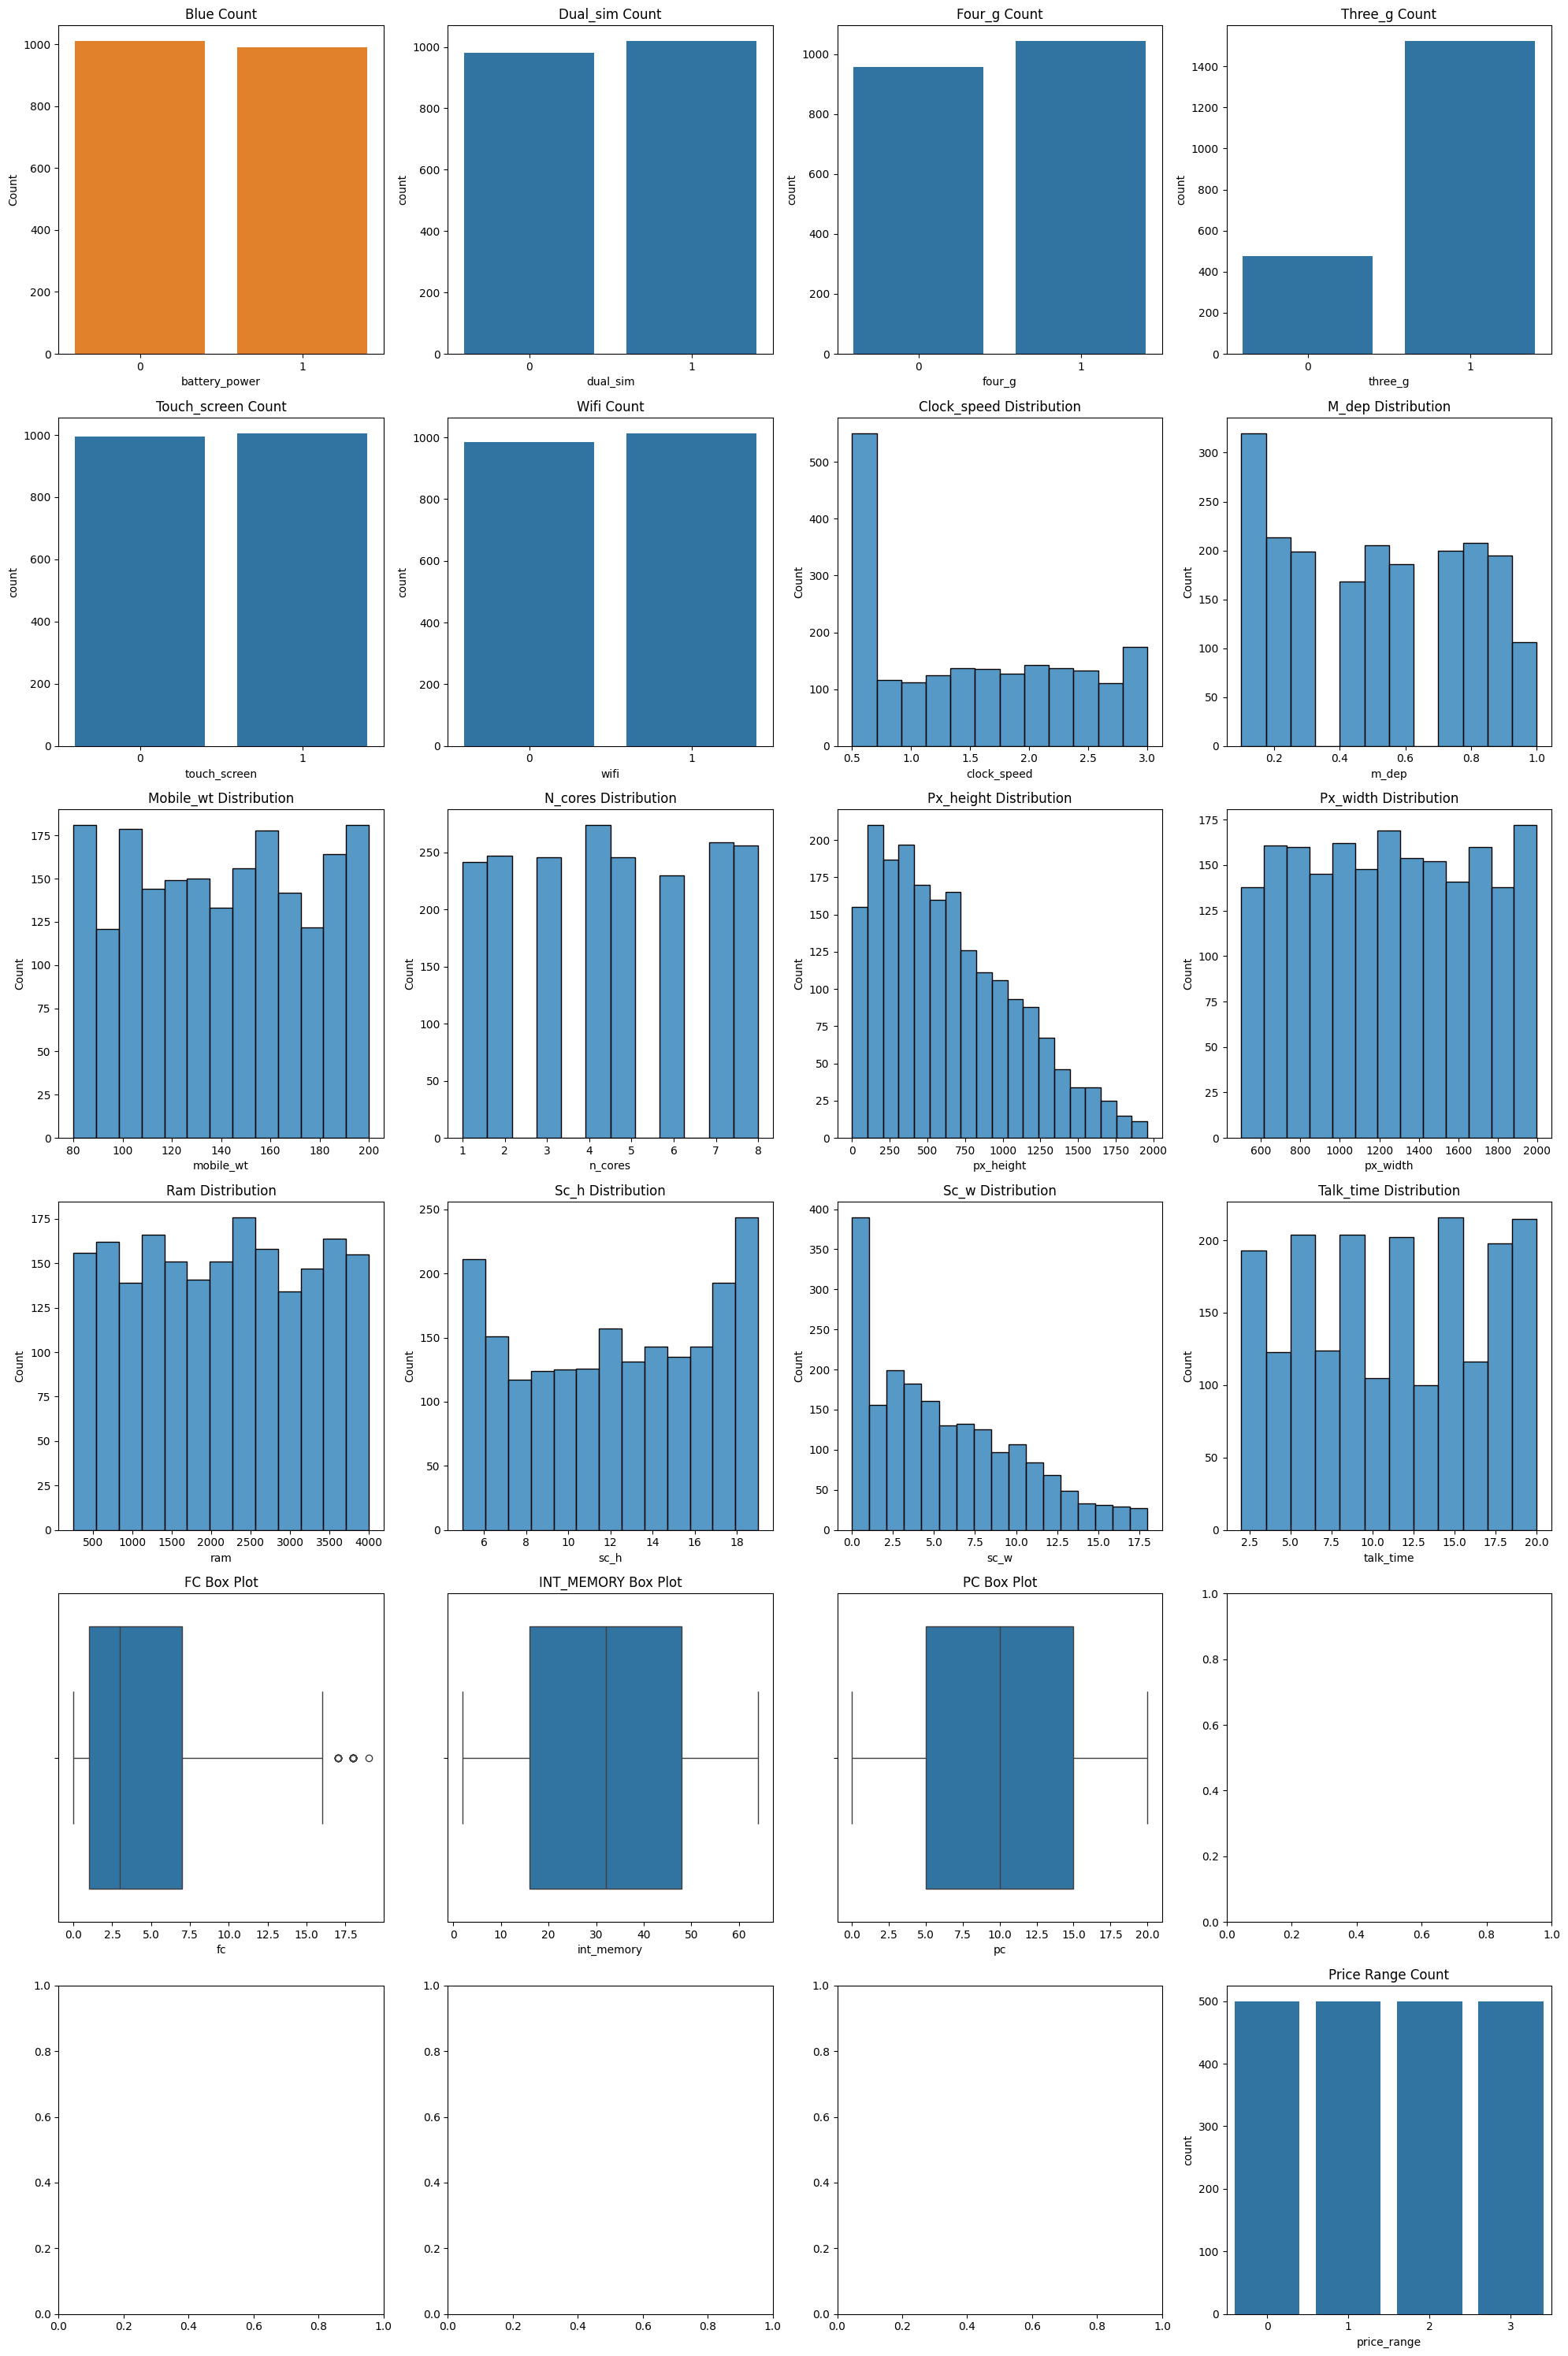

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(20, 30))

sns.histplot(df_classification_train['battery_power'], ax=axes[0, 0])
axes[0, 0].set_title('Battery Power Distribution')

binary_vars = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']
for i, var in enumerate(binary_vars):
    sns.countplot(x=var, data=df_classification_train, ax=axes[i//4, i%4])
    axes[i//4, i%4].set_title(f'{var.capitalize()} Count')

continuous_vars = ['clock_speed', 'm_dep', 'mobile_wt', 'n_cores', 'px_height', 'px_width',
                   'ram', 'sc_h', 'sc_w', 'talk_time']
for i, var in enumerate(continuous_vars):
    sns.histplot(df_classification_train[var], ax=axes[(i+len(binary_vars))//4, (i+len(binary_vars))%4])
    axes[(i+len(binary_vars))//4, (i+len(binary_vars))%4].set_title(f'{var.capitalize()} Distribution')

for i, var in enumerate(['fc', 'int_memory', 'pc']):
    sns.boxplot(x=var, data=df_classification_train, ax=axes[(i+len(binary_vars)+len(continuous_vars))//4,
                                                              (i+len(binary_vars)+len(continuous_vars))%4])
    axes[(i+len(binary_vars)+len(continuous_vars))//4,
         (i+len(binary_vars)+len(continuous_vars))%4].set_title(f'{var.upper()} Box Plot')

sns.countplot(x='price_range', data=df_classification_train, ax=axes[-1, -1])
axes[-1, -1].set_title('Price Range Count')

plt.tight_layout()
plt.show()


In [8]:
df_classification_test = pd.read_csv('/content/drive/My Drive/AI/datasets/mobile_price_classification_test.csv')

In [9]:
df_classification_test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [10]:
df_classification_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

In [11]:
df_classification_test.drop("id", axis=1, inplace=True)

In [12]:
df_classification_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1000 non-null   int64  
 1   blue           1000 non-null   int64  
 2   clock_speed    1000 non-null   float64
 3   dual_sim       1000 non-null   int64  
 4   fc             1000 non-null   int64  
 5   four_g         1000 non-null   int64  
 6   int_memory     1000 non-null   int64  
 7   m_dep          1000 non-null   float64
 8   mobile_wt      1000 non-null   int64  
 9   n_cores        1000 non-null   int64  
 10  pc             1000 non-null   int64  
 11  px_height      1000 non-null   int64  
 12  px_width       1000 non-null   int64  
 13  ram            1000 non-null   int64  
 14  sc_h           1000 non-null   int64  
 15  sc_w           1000 non-null   int64  
 16  talk_time      1000 non-null   int64  
 17  three_g        1000 non-null   int64  
 18  touch_scr

In [28]:
df_classification_test.shape

(1000, 20)

Divide the data:


*   Train DF => Train (60%), Test (20%) and Validation (20%)
*   Test DF => Prediction1 (50%) and Prediction2 (50%)



In [13]:
X = df_classification_train.drop("price_range", axis=1)
y = df_classification_train["price_range"]

In [22]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

In [16]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Decision Tree Classifier

In [23]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier()

Loss Function => Accuracy

In [24]:
cv_scores = cross_val_score(dt_clf, X_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Accuracy:", cv_scores.mean())

y_pred_val = dt_clf.predict(X_val)
val_accuracy = accuracy_score(y_val, y_pred_val)
print("Validation Accuracy:", val_accuracy)

y_pred_test = dt_clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Test Accuracy:", test_accuracy)

Cross-Validation Scores: [0.7875     0.8375     0.82916667 0.77083333 0.80416667]
Mean Cross-Validation Accuracy: 0.8058333333333334
Validation Accuracy: 0.8075
Test Accuracy: 0.8325


# Random Forest Classifier

In [18]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Loss Function => Accuracy

In [21]:
cv_scores = cross_val_score(rf_clf, X_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Accuracy:", cv_scores.mean())

y_pred_val = rf_clf.predict(X_val)
val_accuracy = accuracy_score(y_val, y_pred_val)
print("Validation Accuracy:", val_accuracy)

y_pred_test = rf_clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Test Accuracy:", test_accuracy)

Cross-Validation Scores: [0.86666667 0.87083333 0.89166667 0.84166667 0.86666667]
Mean Cross-Validation Accuracy: 0.8675
Validation Accuracy: 0.8675
Test Accuracy: 0.8625


Predictions

In [35]:
dtc_predictions = dt_clf.predict(df_classification_test.iloc[0:df_classification_test.shape[0]//2])
rfc_predictions = rf_clf.predict(df_classification_test.iloc[df_classification_test.shape[0]//2:df_classification_test.shape[0]])

In [36]:
print(dtc_predictions)

[3 3 2 3 1 3 3 0 3 0 3 3 0 0 2 1 2 1 3 2 1 2 1 1 3 0 2 0 3 0 2 0 3 0 1 1 3
 1 2 2 0 2 0 0 0 1 1 3 1 2 1 0 2 0 3 1 3 1 1 3 3 3 0 1 1 1 1 2 1 2 1 2 2 3
 3 0 2 0 2 3 1 3 3 0 3 0 3 1 3 0 1 2 2 1 2 1 1 2 1 2 1 0 0 2 1 2 0 1 2 3 3
 2 1 3 3 3 3 2 3 0 0 3 1 1 2 0 3 2 3 1 0 2 1 1 3 1 1 0 3 2 1 2 1 3 2 3 3 2
 2 3 2 3 1 0 3 2 3 3 3 3 2 2 3 3 2 3 1 0 3 0 0 0 1 0 0 1 1 0 1 3 0 0 0 1 1
 2 2 0 0 0 0 1 0 3 2 1 2 2 2 3 1 2 3 2 3 2 1 1 1 0 1 2 0 1 3 3 0 2 0 3 2 2
 3 1 0 1 0 3 0 1 0 2 2 1 2 1 3 0 3 1 2 0 0 2 1 3 2 3 0 1 3 0 0 2 3 3 1 3 1
 1 3 2 1 2 3 3 3 1 0 1 2 2 1 1 3 2 0 3 0 0 2 0 0 3 2 3 3 3 1 3 2 2 3 1 2 1
 2 0 2 3 1 0 1 3 0 3 0 1 2 0 2 3 1 3 2 2 0 2 0 0 0 1 3 2 0 0 0 3 2 0 3 3 0
 2 2 1 3 1 3 3 2 2 2 3 3 1 3 1 3 1 3 1 2 3 0 1 0 3 1 3 2 3 0 0 0 0 2 0 0 2
 1 1 1 3 2 0 1 0 0 3 2 0 3 1 2 2 1 2 3 1 0 2 2 1 2 0 0 0 0 3 2 1 0 1 0 0 1
 1 0 0 0 2 2 3 2 3 0 3 0 3 0 1 1 1 1 0 3 2 3 3 1 3 1 3 2 3 2 1 2 2 1 2 0 0
 0 1 2 0 0 3 2 0 2 2 0 0 3 0 2 1 3 3 3 1 3 0 2 3 3 3 0 2 0 2 2 0 1 2 1 0 1
 1 1 3 3 3 2 2 1 2 2 2 3 

In [37]:
print(rfc_predictions)

[1 0 2 2 0 0 0 3 1 0 2 2 2 0 3 1 2 2 0 3 0 3 3 0 1 1 3 3 1 1 2 3 2 0 2 1 3
 0 3 3 1 2 2 2 3 0 1 2 3 1 3 2 3 1 0 0 0 3 2 0 3 2 3 2 0 3 3 3 2 3 3 1 2 1
 2 3 3 0 0 1 1 2 2 2 0 0 2 2 3 1 0 2 0 3 3 0 1 3 0 2 1 0 0 0 2 1 0 1 1 2 2
 0 2 2 1 0 3 0 0 3 2 0 0 0 0 0 3 0 3 1 3 2 1 3 3 0 2 1 3 2 3 1 0 3 0 2 0 2
 0 1 2 1 1 2 1 3 1 3 2 1 1 3 2 0 1 2 0 3 3 0 2 1 1 2 0 3 2 0 3 2 3 0 0 3 0
 1 2 3 2 2 2 2 1 2 3 0 1 0 1 2 1 0 0 1 0 0 3 0 1 1 0 0 1 1 3 0 3 2 3 0 0 1
 2 2 1 0 1 1 0 1 1 0 0 3 3 0 3 1 2 3 0 1 0 2 2 0 3 1 0 3 0 1 0 3 3 3 2 3 0
 3 2 0 1 0 2 3 2 0 2 2 3 0 0 3 2 0 3 1 2 1 1 1 3 1 1 1 2 0 0 2 2 0 2 0 1 0
 0 3 3 3 3 0 1 2 2 1 0 0 2 1 0 2 0 2 2 2 1 2 0 2 1 3 0 0 3 2 3 0 0 2 2 2 1
 2 2 1 0 0 2 3 1 3 0 0 0 2 2 1 2 0 3 2 1 2 3 3 0 2 1 2 1 2 2 0 1 3 1 1 3 1
 2 3 2 1 1 2 3 3 0 2 3 0 2 3 2 2 2 3 2 0 1 2 0 1 1 1 2 2 2 1 2 1 0 1 3 1 0
 1 2 3 1 0 0 3 2 2 3 0 3 3 2 1 3 0 1 3 1 2 1 1 3 2 0 3 0 2 3 0 3 2 3 3 1 0
 2 3 1 0 1 1 2 2 3 0 2 2 0 2 3 2 3 0 2 1 1 2 2 3 3 0 2 1 2 1 3 0 1 3 0 1 0
 0 3 2 2 0 0 0 0 3 2 3 2 

# Regression Task

In [38]:
import pandas as pd
df_regression = pd.read_csv('/content/drive/My Drive/AI/datasets/Steel_industry.csv')

In [39]:
df_regression.head()

,Date_Time,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_Of_Week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


In [40]:
df_regression.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35041 entries, 0 to 35040
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Date_Time                             35041 non-null  object 
 1   Usage_kWh                             35041 non-null  float64
 2   Lagging_Current_Reactive.Power_kVarh  35041 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  35041 non-null  float64
 4   CO2(tCO2)                             35041 non-null  float64
 5   Lagging_Current_Power_Factor          35041 non-null  float64
 6   Leading_Current_Power_Factor          35041 non-null  float64
 7   NSM                                   35041 non-null  int64  
 8   WeekStatus                            35041 non-null  object 
 9   Day_Of_Week                           35041 non-null  object 
 10  Load_Type                             35041 non-null  object 
dtypes: float64(6), 

In [45]:
df_regression["Usage_kWh"].value_counts()

3.06      631
2.95      609
2.92      598
3.02      560
2.88      556
         ... 
98.68       1
107.96      1
127.12      1
149.65      1
4.15        1
Name: Usage_kWh, Length: 3344, dtype: int64

In [46]:
df_regression.shape

(35041, 11)

In [48]:
df_regression.drop("Date_Time", axis=1, inplace=True)

Analyse categorical variables

In [49]:
df_regression["WeekStatus"].value_counts()

Weekday    25057
Weekend     9984
Name: WeekStatus, dtype: int64

In [50]:
df_regression["Day_Of_Week"].value_counts()

Monday       5089
Tuesday      4992
Wednesday    4992
Thursday     4992
Friday       4992
Saturday     4992
Sunday       4992
Name: Day_Of_Week, dtype: int64

In [51]:
df_regression["Load_Type"].value_counts()

Light_Load      18073
Medium_Load      9696
Maximum_Load     7272
Name: Load_Type, dtype: int64

In [61]:
df_regression.isnull().sum()

Usage_kWh                               0
Lagging_Current_Reactive.Power_kVarh    0
Leading_Current_Reactive_Power_kVarh    0
CO2(tCO2)                               0
Lagging_Current_Power_Factor            0
Leading_Current_Power_Factor            0
NSM                                     0
WeekStatus                              0
Day_Of_Week                             0
Load_Type                               0
dtype: int64

Encode categorical variables

In [53]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

In [54]:
onehot_cols = ['WeekStatus']
ordinal_cols = ['Day_Of_Week', 'Load_Type']

In [55]:
onehot_pipeline = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

ordinal_pipeline = Pipeline([
    ('ordinal', OrdinalEncoder())
])

preprocessor = ColumnTransformer(transformers=[
    ('onehot', onehot_pipeline, onehot_cols),
    ('ordinal', ordinal_pipeline, ordinal_cols)
], remainder='passthrough')


In [56]:
processed_data = preprocessor.fit_transform(df_regression)

In [58]:
encoded_onehot_cols = preprocessor.named_transformers_['onehot'].named_steps['onehot'] \
                      .get_feature_names_out(input_features=onehot_cols)

encoded_cols = list(encoded_onehot_cols) + ordinal_cols + list(df_regression.columns.drop(onehot_cols + ordinal_cols))

processed_df = pd.DataFrame(processed_data, columns=encoded_cols)
print(processed_df)

       WeekStatus_Weekday  WeekStatus_Weekend  Day_Of_Week  Load_Type  \
0                     1.0                 0.0          1.0        0.0   
1                     1.0                 0.0          1.0        0.0   
2                     1.0                 0.0          1.0        0.0   
3                     1.0                 0.0          1.0        0.0   
4                     1.0                 0.0          1.0        0.0   
...                   ...                 ...          ...        ...   
35036                 1.0                 0.0          1.0        0.0   
35037                 1.0                 0.0          1.0        0.0   
35038                 1.0                 0.0          1.0        0.0   
35039                 1.0                 0.0          1.0        0.0   
35040                 1.0                 0.0          1.0        0.0   

       Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
0           3.17                                  2.95   
1      

In [60]:
processed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35041 entries, 0 to 35040
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   WeekStatus_Weekday                    35041 non-null  float64
 1   WeekStatus_Weekend                    35041 non-null  float64
 2   Day_Of_Week                           35041 non-null  float64
 3   Load_Type                             35041 non-null  float64
 4   Usage_kWh                             35041 non-null  float64
 5   Lagging_Current_Reactive.Power_kVarh  35041 non-null  float64
 6   Leading_Current_Reactive_Power_kVarh  35041 non-null  float64
 7   CO2(tCO2)                             35041 non-null  float64
 8   Lagging_Current_Power_Factor          35041 non-null  float64
 9   Leading_Current_Power_Factor          35041 non-null  float64
 10  NSM                                   35041 non-null  float64
dtypes: float64(11)


In [63]:
day_week = df_regression["Day_Of_Week"].unique()

comparison_df = pd.DataFrame({"Old_Day_Of_Week": day_week,
                              "Encoded_Day_Of_Week": processed_df["Day_Of_Week"].unique()})

comparison_df = comparison_df.sort_values(by="Old_Day_Of_Week").reset_index(drop=True)

print(comparison_df)

  Old_Day_Of_Week  Encoded_Day_Of_Week
0          Friday                  0.0
1          Monday                  1.0
2        Saturday                  2.0
3          Sunday                  3.0
4        Thursday                  4.0
5         Tuesday                  5.0
6       Wednesday                  6.0


In [64]:
load_type = df_regression["Load_Type"].unique()

comparison_df = pd.DataFrame({"Old_Load_Type": load_type,
                              "Encoded_Load_Type": processed_df["Load_Type"].unique()})

comparison_df = comparison_df.sort_values(by="Old_Load_Type").reset_index(drop=True)

print(comparison_df)

  Old_Load_Type  Encoded_Load_Type
0    Light_Load                0.0
1  Maximum_Load                1.0
2   Medium_Load                2.0


Visualize the data

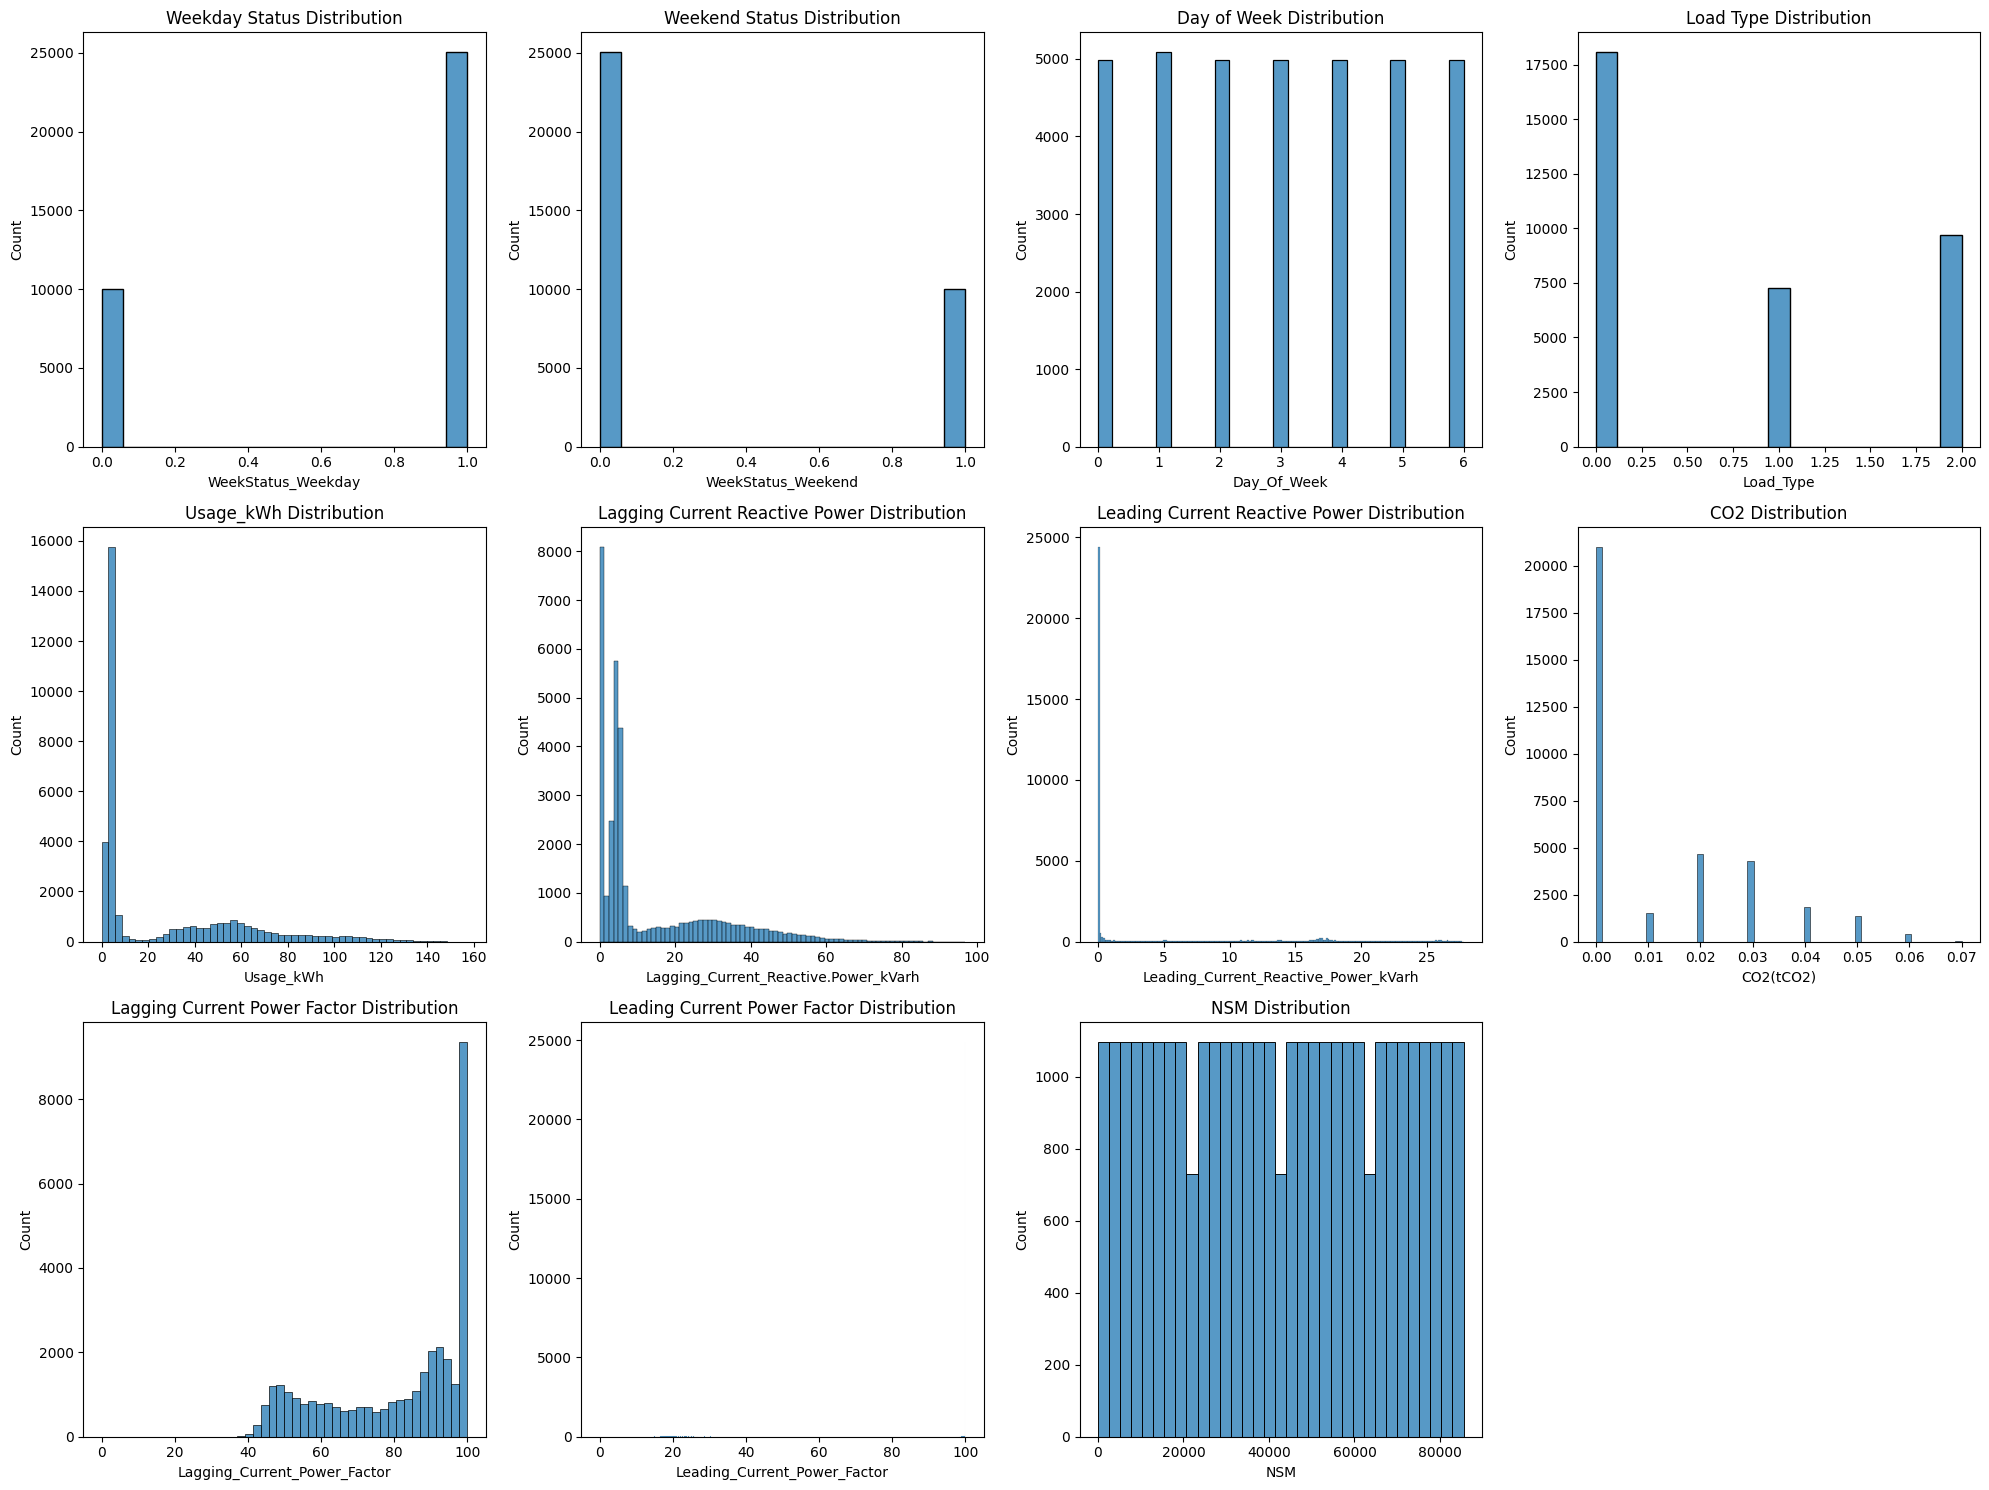

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 15))

sns.histplot(processed_df['WeekStatus_Weekday'], ax=axes[0, 0])
axes[0, 0].set_title('Weekday Status Distribution')

sns.histplot(processed_df['WeekStatus_Weekend'], ax=axes[0, 1])
axes[0, 1].set_title('Weekend Status Distribution')

sns.histplot(processed_df['Day_Of_Week'], ax=axes[0, 2])
axes[0, 2].set_title('Day of Week Distribution')

sns.histplot(processed_df['Load_Type'], ax=axes[0, 3])
axes[0, 3].set_title('Load Type Distribution')

sns.histplot(processed_df['Usage_kWh'], ax=axes[1, 0])
axes[1, 0].set_title('Usage_kWh Distribution')

sns.histplot(processed_df['Lagging_Current_Reactive.Power_kVarh'], ax=axes[1, 1])
axes[1, 1].set_title('Lagging Current Reactive Power Distribution')

sns.histplot(processed_df['Leading_Current_Reactive_Power_kVarh'], ax=axes[1, 2])
axes[1, 2].set_title('Leading Current Reactive Power Distribution')

sns.histplot(processed_df['CO2(tCO2)'], ax=axes[1, 3])
axes[1, 3].set_title('CO2 Distribution')

sns.histplot(processed_df['Lagging_Current_Power_Factor'], ax=axes[2, 0])
axes[2, 0].set_title('Lagging Current Power Factor Distribution')

sns.histplot(processed_df['Leading_Current_Power_Factor'], ax=axes[2, 1])
axes[2, 1].set_title('Leading Current Power Factor Distribution')

sns.histplot(processed_df['NSM'], ax=axes[2, 2])
axes[2, 2].set_title('NSM Distribution')

fig.delaxes(axes[2, 3])

plt.tight_layout()
plt.show()

In [67]:
X = processed_df.drop("Usage_kWh", axis=1)
y = processed_df["Usage_kWh"]

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Decision Tree Regressor

In [70]:
dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [72]:
cv_scores = cross_val_score(dt_reg, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation MSE:", -cv_scores.mean())

y_pred_val = dt_reg.predict(X_val)
val_mse = mean_squared_error(y_val, y_pred_val)
print("Validation Mean Squared Error:", val_mse)

y_pred_test = dt_reg.predict(X_test)
test_mse = mean_squared_error(y_test, y_pred_test)
print("Test Mean Squared Error:", test_mse)

Cross-Validation Scores: [-2.89192376 -2.93786205 -2.14252043 -2.66100528 -3.42275005]
Mean Cross-Validation MSE: 2.811212311536151
Validation Mean Squared Error: 2.6267106735159813
Test Mean Squared Error: 2.1061665002140106


# Random Forest Regressor

In [71]:
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [74]:
cv_scores = cross_val_score(rf_reg, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation MSE:", -cv_scores.mean())

y_pred_val = rf_reg.predict(X_val)
val_mse = mean_squared_error(y_val, y_pred_val)
print("Validation Mean Squared Error:", val_mse)

y_pred_test = rf_reg.predict(X_test)
test_mse = mean_squared_error(y_test, y_pred_test)
print("Test Mean Squared Error:", test_mse)

Cross-Validation Scores: [-2.14830177 -1.58090376 -1.09996911 -1.63344204 -1.50450246]
Mean Cross-Validation MSE: 1.5934238288507796
Validation Mean Squared Error: 1.0541612572588452
Test Mean Squared Error: 1.3144794770366637


Predictions

In [75]:
df_for_test = {
    'WeekStatus_Weekday': 1.0,
    'WeekStatus_Weekend': 0.0,
    'Day_Of_Week': 3.0,
    'Load_Type': 1.0,
    'Lagging_Current_Reactive.Power_kVarh': 5.26,
    'Leading_Current_Reactive_Power_kVarh': 0.09,
    'CO2(tCO2)': 0.1,
    'Lagging_Current_Power_Factor': 77.79,
    'Leading_Current_Power_Factor': 99.98,
    'NSM': 82760.35
}

df_for_test = pd.DataFrame([df_for_test])

In [76]:
dtr_prediction = dt_reg.predict(df_for_test)
print(dtr_prediction)

[144.29]


In [77]:
rfr_prediction = rf_reg.predict(df_for_test)
print(rfr_prediction)

[145.97]
